In [3]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)


In [ ]:
# standard = ['2016_standard.csv','2017_standard.csv','2018_standard.csv','2019_standard.csv','2020_standard.csv',
#            '2021_standard.csv','2022_standard.csv']
# ppr = ['2016_ppr.csv','2017_ppr.csv','2018_ppr.csv','2019_ppr.csv','2020_ppr.csv',
#            '2021_ppr.csv','2022_ppr.csv']

In [ ]:
# seasons = range(2016,2023)
# a = []
# for seas,stand,p in zip(seasons,standard,ppr):
#     df0 = pd.read_csv(stand,index_col=0)
#     df1 = pd.read_csv(p,index_col=0)
#     df = df0[['Name','Team','AverageDraftPosition']].merge(df1[['Name','Team','AverageDraftPositionPPR']]
#                                                           ,left_on=['Name','Team'],right_on=['Name','Team'])
#     df['year'] = seas
#     a.append(df)

# Merge Season Data with ADP

In [ ]:
# df_adp = pd.read_csv('adp.csv',index_col=0)
# df_adp.Name = df_adp.Name.str.replace(' II','').str.replace('GordonI','Gordon').str.strip()
# df_adp = df_adp.reset_index(drop=True)

# df = pd.read_csv('ffb_df.csv',index_col=0)
# df.Player = df.Player.str.replace('*','').str.replace('+','').str.strip()

In [ ]:
# seasons = range(2016,2023)
# new_list = []
# for s in seasons:
#     list1 = df_adp[df_adp.year==s][['Name']].sort_values('Name')['Name'].tolist()
#     list2 = df[df.year==s][['Player']].sort_values('Player')['Player'].tolist()
#     player = pd.DataFrame({'player':(list(set(list1).intersection(list2)))})
#     comb1 = player.merge(df[df.year==s],left_on=['player'],right_on=['Player'])
#     comb2 = comb1.merge(df_adp[df_adp.year==s],left_on=['player'],right_on=['Name'])
#     new_list.append(comb2)

In [ ]:
# test = pd.concat(new_list)
# test = test.reset_index(drop=True)
# to_drop = ['Player','2:00 PM','2PP','DKPt','FDPt','OvRank','-9999','Name','Team','year_y']
# test = test.drop(to_drop,axis=1).copy()

# cols = ['player','rk','team','pos','age','g','gs','cmp','pass_att','pass_yds','pass_tds','int','rush_att','rush_yard',
#        'y/a','rush_tds','tgt','rec','rec_yards','y/r','rec_tds','fmb','fl','rush_rec_tds','standard_pts','ppr_pts',
#        'vbd','pos_rank','year','avg_draft_pos','avg_draft_pos_ppr']

# test.columns = cols

# test[['y/a','y/r','fmb','standard_pts','ppr_pts','vbd']] = test[['y/a','y/r','fmb','standard_pts','ppr_pts','vbd']].fillna(0)
# test = test.dropna()
# test = test.drop_duplicates(['player','year'])
# test = test.drop(index=[1973])
# test.loc[test[test.avg_draft_pos_ppr>350].index,'avg_draft_pos_ppr'] = 350
# test.loc[test[test.avg_draft_pos>350].index,'avg_draft_pos'] = 350
# test.to_csv('season.csv')

# Exploration

### What percent of top x final ppr points by position each season and for all seasons

In [4]:
df = pd.read_csv('season1.csv',index_col=0)

In [9]:
def print_pos(df,pos,year,limit):
    print(df[(df.year==year) & (df.pos==pos)][['player','pos','standard_pts','ppr_pts']].sort_values('ppr_pts',ascending=False).head(limit))
    
def top_players_by_pos(yr,limit):
    print(df[df.year==yr][['pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(limit).groupby('pos').count()/limit)
    
def print_top_ppr(season,limit):
    print(df[df.year==season][['player','pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(limit))

In [1]:
df = pd.read_csv('season1.csv')
seasons = range(2010,2023)
new = []

for s in seasons:
    num = [3,6,12,18,24,30,36,42,48,54,60,66,72]
    wr = []
    rb = []
    li = [rb,wr]
    pos = ['RB','WR']

    for n in range(3,72,3):
        d = df[(df.year==s) & ((df.pos=='WR') | (df.pos== 'RB'))][['pos','ppr_pts']].\
        sort_values(by='ppr_pts',ascending=False).head(n).groupby('pos').count()/n
        
        for p,l in zip(pos,li):
            try:
                l.append(d.loc[p,'ppr_pts'])
            except:
                l.append(0)
                
    new.append(pd.DataFrame({'n':range(3,72,3),'rb':rb,'wr':wr}))

plt.figure(figsize=(18,9))
prop_rb_wr = pd.concat(new)
prop_rb_wr.groupby('n').mean().plot()
plt.title('Do RBs or WRs Score More Points?')
plt.ylabel('Percent')
plt.xlabel('Top "n" Players')
plt.savefig('rb_wr_pts.png')
plt.show()


NameError: name 'pd' is not defined

In [124]:
non_inj[non_inj.pos=='RB'].groupby('adp_by_pos')['ppr_pts'].mean().head(50)

adp_by_pos
1     277.633333
2     263.927273
3     289.881818
4     269.766667
5     248.555556
6     241.625000
7     268.530000
8     244.588889
9     225.800000
10    225.800000
11    251.260000
12    221.872727
13    237.254545
14    178.514286
15    190.636364
16    200.190909
17    168.133333
18    203.345455
19    199.800000
20    163.350000
21    128.587500
22    189.057143
23    184.100000
24    137.425000
25    144.287500
26    170.063636
27    178.144444
28    164.188889
29    165.581818
30    110.825000
31    163.233333
32    165.900000
33    142.622222
34    146.008333
35    130.292308
36    148.910000
37    114.200000
38    152.818182
39    136.240000
40    125.250000
41    128.490909
42    121.785714
43    111.818182
44    111.055556
45    130.033333
46     91.525000
47    132.600000
48     86.370000
49    105.700000
50    113.700000
Name: ppr_pts, dtype: float64

<AxesSubplot:xlabel='adp_by_pos'>

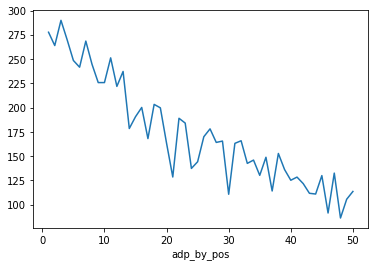

In [125]:
non_inj[non_inj.pos=='RB'].groupby('adp_by_pos')['ppr_pts'].mean().head(50).plot()

In [9]:
df[df.year==2022][['player','pos','adp','ppr_pts']].sort_values('adp').head(50)

,player,pos,adp,ppr_pts
6652,Jonathan Taylor,RB,1.0,146.4
6623,Derrick Henry,RB,2.0,302.8
6621,Christian McCaffrey,RB,3.0,356.4
6630,Dalvin Cook,RB,4.0,237.8
6804,Cooper Kupp,WR,5.0,201.4
6782,Justin Jefferson,WR,6.0,368.7
6625,Nick Chubb,RB,7.0,281.4
6620,Austin Ekeler,RB,8.0,372.7
6792,Ja'Marr Chase,WR,9.0,242.4
6633,Najee Harris,RB,10.0,223.5


In [5]:
df.head()

,rk,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,...,fl,rush_rec_tds,ppr_pts,vbd,pos_rank,year,adp,adp_by_pos,success,round
0,12,Michael Vick,PHI,QB,30,12,12,233.0,372.0,3018.0,...,3.0,9,310.3,81.0,1,2010,350.0,54,1.0,15.0
1,17,Aaron Rodgers,GNB,QB,27,15,15,312.0,475.0,3922.0,...,1.0,4,304.5,75.0,2,2010,7.0,1,1.0,1.0
2,20,Tom Brady,NWE,QB,33,16,16,324.0,492.0,3900.0,...,1.0,1,299.0,70.0,3,2010,27.0,4,1.0,3.0
3,25,Peyton Manning,IND,QB,34,16,16,450.0,679.0,4700.0,...,1.0,0,285.8,57.0,4,2010,21.0,3,0.0,2.0
4,28,Philip Rivers,SDG,QB,29,16,16,357.0,541.0,4710.0,...,4.0,0,281.6,53.0,5,2010,48.0,7,1.0,4.0


In [156]:
prop_rb_wr = prop_rb_wr.groupby('n').mean()

In [162]:

prop_rb_wr[prop_rb_wr.index.isin([3,6,12,30])]

,rb,wr
n,,
3,0.641026,0.358974
6,0.538462,0.461538
12,0.410256,0.589744
30,0.382051,0.617949


In [211]:
df = pd.read_csv('season1.csv')

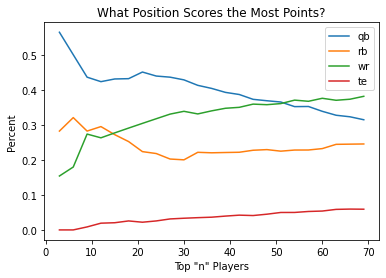

In [210]:
df = pd.read_csv('season1.csv')
seasons = range(2010,2023)
new = []

for s in seasons:
    num = [3,6,12,18,24,30,36,42,48,54,60,66,72]
    qb = []
    wr = []
    rb = []
    te = []
    li = [qb,rb,wr,te]
    pos = ['QB','RB','WR','TE']

    for n in range(3,72,3):
        d = df[df.year==s][['pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(n).\
        groupby('pos').count()/n
        for p,l in zip(pos,li):
            try:
                l.append(d.loc[p,'ppr_pts'])
            except:
                l.append(0)
                
    new.append(pd.DataFrame({'n':range(3,72,3),'qb':qb,'rb':rb,'wr':wr,'te':te}))

prop_all_positions = pd.concat(new)
prop_all_positions.groupby('n').mean().plot()
plt.title('What Position Scores the Most Points?')
plt.ylabel('Percent')
plt.xlabel('Top "n" Players')
plt.savefig('top_n_players.png')
plt.show()

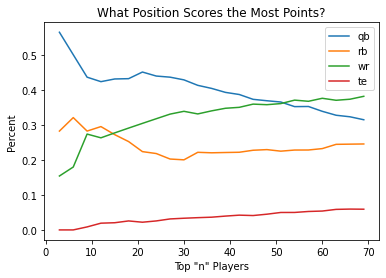

In [166]:
prop_all_positions.groupby('n').mean()

,qb,rb,wr,te
n,,,,
3,0.564103,0.282051,0.153846,0.000000
6,0.500000,0.320513,0.179487,0.000000
9,0.435897,0.282051,0.273504,0.008547
12,0.423077,0.294872,0.262821,0.019231
15,0.430769,0.271795,0.276923,0.020513
18,0.431624,0.252137,0.290598,0.025641
21,0.450549,0.223443,0.304029,0.021978
24,0.439103,0.217949,0.317308,0.025641
27,0.435897,0.202279,0.330484,0.031339


In [175]:
df.head()

,rk,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,ppr_pts,vbd,pos_rank,year,adp,adp_by_pos,success,round
0,12,Michael Vick,PHI,QB,30,12,12,233.0,372.0,3018.0,21.0,6.0,100.0,676.0,6.76,9.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,9,310.3,81.0,1,2010,350.0,54,1.0,15.0
1,17,Aaron Rodgers,GNB,QB,27,15,15,312.0,475.0,3922.0,28.0,11.0,64.0,356.0,5.56,4.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4,304.5,75.0,2,2010,7.0,1,1.0,1.0
2,20,Tom Brady,NWE,QB,33,16,16,324.0,492.0,3900.0,36.0,4.0,31.0,30.0,0.97,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1,299.0,70.0,3,2010,27.0,4,1.0,3.0
3,25,Peyton Manning,IND,QB,34,16,16,450.0,679.0,4700.0,33.0,17.0,18.0,18.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0,285.8,57.0,4,2010,21.0,3,0.0,2.0
4,28,Philip Rivers,SDG,QB,29,16,16,357.0,541.0,4710.0,30.0,13.0,29.0,52.0,1.79,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0,281.6,53.0,5,2010,48.0,7,1.0,4.0


In [178]:
df[(df.pos=='RB')|(df.pos=='WR')][['player','pos','ppr_pts']].sort_values('ppr_pts',ascending=False).head(20)

,player,pos,ppr_pts
4876,Christian McCaffrey,RB,471.2
6192,Cooper Kupp,WR,439.5
3245,David Johnson,RB,407.8
79,Arian Foster,RB,392.0
2874,Antonio Brown,WR,388.2
2349,Antonio Brown,WR,386.9
4329,Saquon Barkley,RB,385.8
4330,Christian McCaffrey,RB,385.5
3792,Todd Gurley,RB,383.3
1653,Jamaal Charles,RB,378.0


In [167]:
df.head()

,rk,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,ppr_pts,vbd,pos_rank,year,adp,adp_by_pos,success,round
0,12,Michael Vick,PHI,QB,30,12,12,233.0,372.0,3018.0,21.0,6.0,100.0,676.0,6.76,9.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,9,310.3,81.0,1,2010,350.0,54,1.0,15.0
1,17,Aaron Rodgers,GNB,QB,27,15,15,312.0,475.0,3922.0,28.0,11.0,64.0,356.0,5.56,4.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4,304.5,75.0,2,2010,7.0,1,1.0,1.0
2,20,Tom Brady,NWE,QB,33,16,16,324.0,492.0,3900.0,36.0,4.0,31.0,30.0,0.97,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1,299.0,70.0,3,2010,27.0,4,1.0,3.0
3,25,Peyton Manning,IND,QB,34,16,16,450.0,679.0,4700.0,33.0,17.0,18.0,18.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0,285.8,57.0,4,2010,21.0,3,0.0,2.0
4,28,Philip Rivers,SDG,QB,29,16,16,357.0,541.0,4710.0,30.0,13.0,29.0,52.0,1.79,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0,281.6,53.0,5,2010,48.0,7,1.0,4.0


In [170]:
df[df.pos=='TE'].groupby('adp_by_pos')[['adp_by_pos','player','round']].mean().head(5)

,adp_by_pos,round
adp_by_pos,,
1,1.0,2.076923
2,2.0,3.307692
3,3.0,4.000000
4,4.0,4.923077
5,5.0,5.461538


In [73]:
df[df.year==2022][['player','adp','ppr_pts']].sort_values('adp').head(50)

,player,adp,ppr_pts
6652,Jonathan Taylor,1.0,146.4
6623,Derrick Henry,2.0,302.8
6621,Christian McCaffrey,3.0,356.4
6630,Dalvin Cook,4.0,237.8
6804,Cooper Kupp,5.0,201.4
6782,Justin Jefferson,6.0,368.7
6625,Nick Chubb,7.0,281.4
6620,Austin Ekeler,8.0,372.7
6792,Ja'Marr Chase,9.0,242.4
6633,Najee Harris,10.0,223.5


In [57]:
prop_all_positions = test.groupby('n').mean()
prop_all_positions

,qb,rb,wr,te
n,,,,
3,0.564103,0.282051,0.153846,0.000000
6,0.500000,0.320513,0.179487,0.000000
9,0.435897,0.282051,0.273504,0.008547
12,0.423077,0.294872,0.262821,0.019231
15,0.430769,0.271795,0.276923,0.020513
18,0.431624,0.252137,0.290598,0.025641
21,0.450549,0.223443,0.304029,0.021978
24,0.439103,0.217949,0.317308,0.025641
27,0.435897,0.202279,0.330484,0.031339


In [34]:
def proportion_of_pos(df):
    '''
    prints out the top 70 players by ppr pts and graphs the proportion of top players grouped by position
    the x axis is the top n players, the y axis is the proportion of positions
    '''

    num = [3,6,12,18,24,30,36,42,48,54,60,66,72]

    qb = []
    wr = []
    rb = []
    te = []
    li = [qb,rb,wr,te]
    pos = ['QB','RB','WR','TE']

    for n in range(3,72,3):
        d = df[['pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(n).\
        groupby('pos').count()/n
        for p,l in zip(pos,li):
            try:
                l.append(d.loc[p,'ppr_pts'])
            except:
                l.append(0)
                
    return pd.DataFrame({'n':range(3,72,3),'qb':qb,'rb':rb,'wr':wr,'te':te})

def proportion_of_pos_all(df):
    '''
    prints out the top 70 players by ppr pts and graphs the proportion of top players grouped by position
    the x axis is the top n players, the y axis is the proportion of positions
    '''

    num = [3,6,12,18,24,30,36,42,48,54,60,66,72]

    qb = []
    wr = []
    rb = []
    te = []
    li = [qb,rb,wr,te]
    pos = ['QB','RB','WR','TE']

    for n in range(3,72,3):
        d = df[['year','pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(n).\
        groupby(['year','pos']).count()/n
        for p,l in zip(pos,li):
            try:
                l.append(d.loc[p,'ppr_pts'])
            except:
                l.append(0)
                
    return pd.DataFrame({'n':range(3,72,3),'qb':qb,'rb':rb,'wr':wr,'te':te})

def proportion_of_pos_rb_wr(df):
    '''
    prints out the top 70 players by ppr pts and graphs the proportion of top players grouped by position
    the x axis is the top n players, the y axis is the proportion of positions
    '''

    num = [3,6,12,18,24,30,36,42,48,54,60,66,72]

    wr = []
    rb = []
    li = [rb,wr,]
    pos = ['RB','WR']

    for n in range(3,72,3):
        d = df[['pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(n).\
        groupby('pos').count()/n
        for p,l in zip(pos,li):
            try:
                l.append(d.loc[p,'ppr_pts'])
            except:
                l.append(0)
                
    return pd.DataFrame({'n':range(3,72,3),'rb':rb,'wr':wr})

In [21]:
df.head(1)

,rk,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,ppr_pts,vbd,pos_rank,year,adp,adp_by_pos,success,round
0,12,Michael Vick,PHI,QB,30,12,12,233.0,372.0,3018.0,21.0,6.0,100.0,676.0,6.76,9.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,9,310.3,81.0,1,2010,350.0,54,1.0,15.0


2010


<Figure size 1440x720 with 0 Axes>

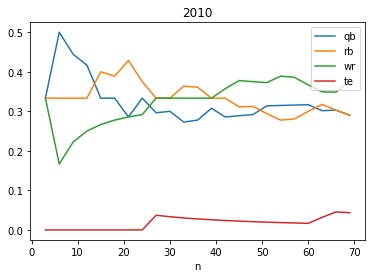

2011


<Figure size 1440x720 with 0 Axes>

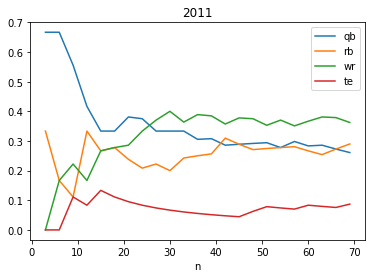

2012


<Figure size 1440x720 with 0 Axes>

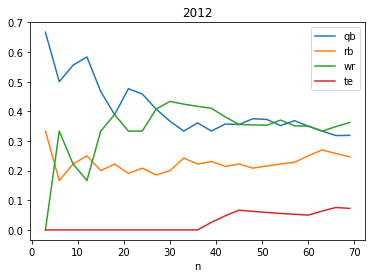

2013


<Figure size 1440x720 with 0 Axes>

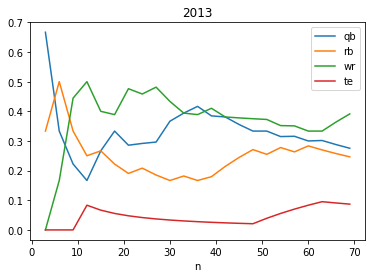

2014


<Figure size 1440x720 with 0 Axes>

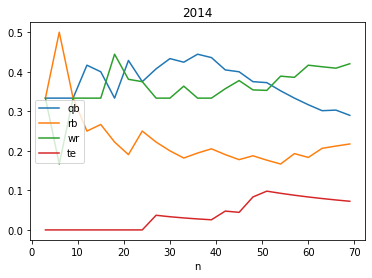

2015


<Figure size 1440x720 with 0 Axes>

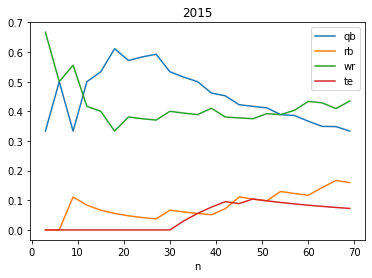

2016


<Figure size 1440x720 with 0 Axes>

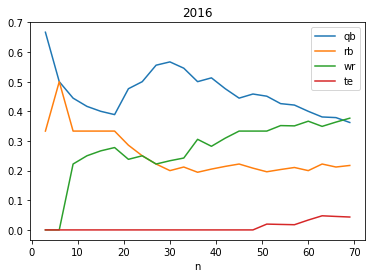

2017


<Figure size 1440x720 with 0 Axes>

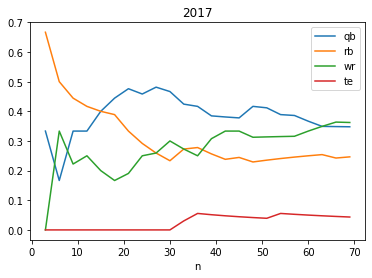

2018


<Figure size 1440x720 with 0 Axes>

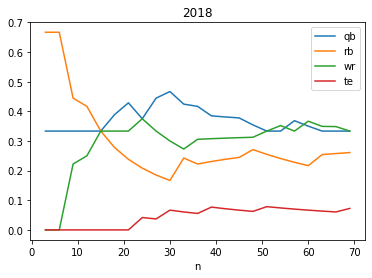

2019


<Figure size 1440x720 with 0 Axes>

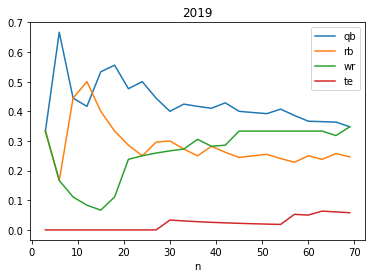

2020


<Figure size 1440x720 with 0 Axes>

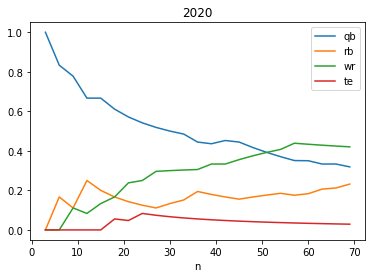

2021


<Figure size 1440x720 with 0 Axes>

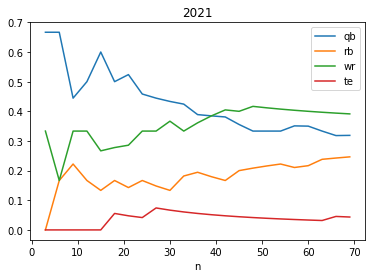

2022


<Figure size 1440x720 with 0 Axes>

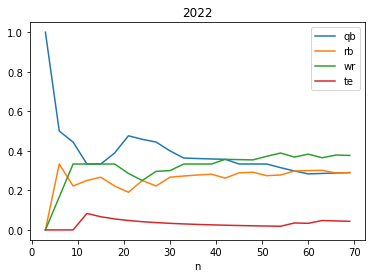

In [12]:
seasons = range(2010,2023)
for s in seasons:
    g = proportion_of_pos(df[df.year==s])
    print(s)
    plt.figure(figsize=(20,10))
    g.plot(x='n')
    plt.title(s)
    plt.show()

2010


<Figure size 1440x720 with 0 Axes>

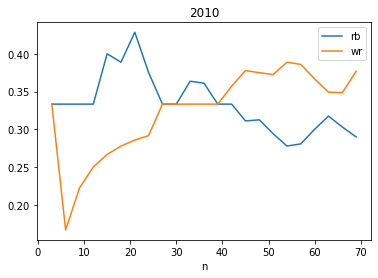

2011


<Figure size 1440x720 with 0 Axes>

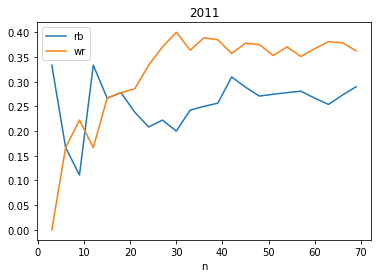

2012


<Figure size 1440x720 with 0 Axes>

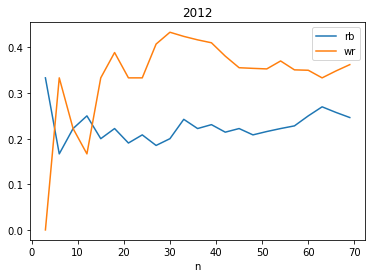

2013


<Figure size 1440x720 with 0 Axes>

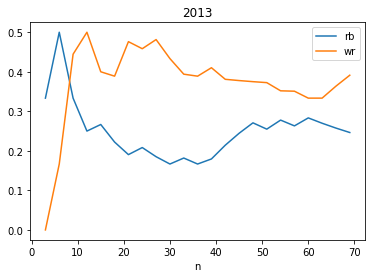

2014


<Figure size 1440x720 with 0 Axes>

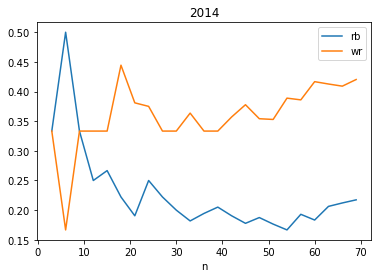

2015


<Figure size 1440x720 with 0 Axes>

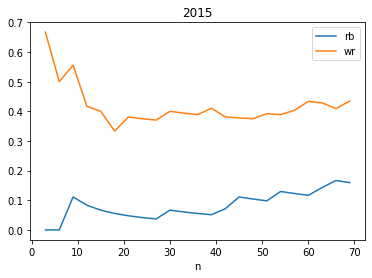

2016


<Figure size 1440x720 with 0 Axes>

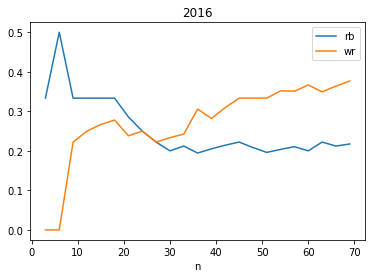

2017


<Figure size 1440x720 with 0 Axes>

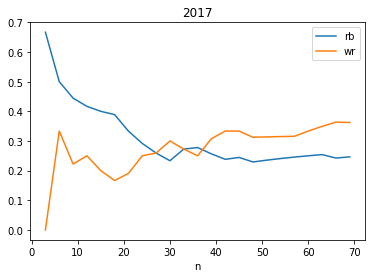

2018


<Figure size 1440x720 with 0 Axes>

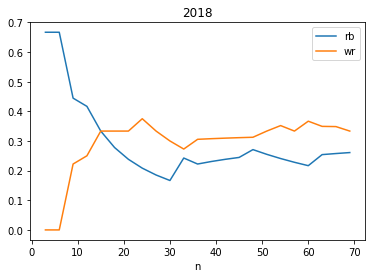

2019


<Figure size 1440x720 with 0 Axes>

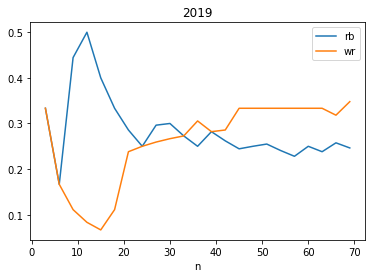

2020


<Figure size 1440x720 with 0 Axes>

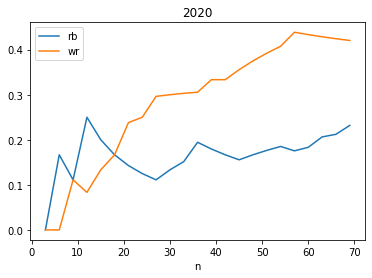

2021


<Figure size 1440x720 with 0 Axes>

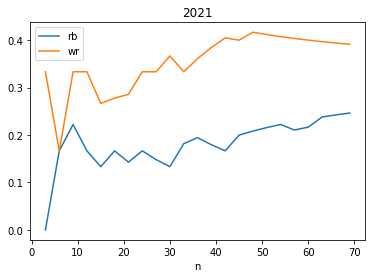

2022


<Figure size 1440x720 with 0 Axes>

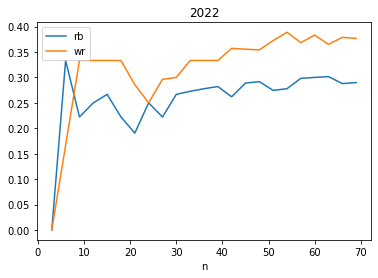

In [14]:
seasons = range(2010,2023)
for s in seasons:
    g = proportion_of_pos_rb_wr(df[df.year==s])
    print(s)
    plt.figure(figsize=(20,10))
    g.plot(x='n')
    plt.title(s)
    plt.show()

In [ ]:
df[df.year==2016]

# Add success columns

We need to add a 'success' column. If a player is drafted top 6 by their position, to be a 'success' they need to finish in the top 6. If they're drafted between 6-36 by their position they're final position ranking needs to beat their positional adp to be a success. Anybody who is drafted outside of the top 36 is a success if they finish in the top 36

In [ ]:
df = pd.read_csv('season.csv',index_col=0)

seasons = range(2016,2023)
positions = ['QB','RB','WR','TE']
add = []

for s in seasons:
    for p in positions:
        test = df[(df.year==s)&(df.pos==p)].sort_values('avg_draft_pos_ppr').reset_index(drop=True)
        test['adp_by_pos'] = test.index+1
        
        test = test[(test.year==s)&(test.pos==p)].sort_values('ppr_pts',ascending=False).reset_index(drop=True)
        test['pos_rank'] = test.index+1
        
        add.append(test)

df = pd.concat(add).reset_index(drop=True)

# Add 'success' column
for i in range(0,len(df.index)):
    if df.loc[i,'pos'] =='QB' or df.loc[i,'pos'] =='TE':
        
        if df.loc[i, 'adp_by_pos'] <= 3:
            if df.loc[i,'pos_rank'] <= 3:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        else:
            if df.loc[i,'pos_rank']<=12:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

    else:
        if df.loc[i, 'adp_by_pos'] <= 6:
            if df.loc[i,'pos_rank'] <= 6:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        elif df.loc[i, 'adp_by_pos'] > 36:
            if df.loc[i,'pos_rank'] < 36:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        else:
            if df.loc[i,'pos_rank'] <= df.loc[i,'adp_by_pos']:
                df.loc[i, 'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        
# Add 'round' columns
for i in range(0,len(df.index)):
    if df.loc[i,'avg_draft_pos_ppr'] <= 12:
        df.loc[i, 'round'] = 1
    elif df.loc[i,'avg_draft_pos_ppr'] <= 24:
        df.loc[i, 'round'] = 2
    elif df.loc[i,'avg_draft_pos_ppr'] <= 36:
        df.loc[i, 'round'] = 3
    elif df.loc[i,'avg_draft_pos_ppr'] <= 48:
        df.loc[i, 'round'] = 4
    elif df.loc[i,'avg_draft_pos_ppr'] <= 60:
        df.loc[i, 'round'] = 5
    elif df.loc[i,'avg_draft_pos_ppr'] <= 72:
        df.loc[i, 'round'] = 6
    elif df.loc[i,'avg_draft_pos_ppr'] <= 84:
        df.loc[i, 'round'] = 7
    elif df.loc[i,'avg_draft_pos_ppr'] <= 96:
        df.loc[i, 'round'] = 8
    elif df.loc[i,'avg_draft_pos_ppr'] <= 108:
        df.loc[i, 'round'] = 9
    elif df.loc[i,'avg_draft_pos_ppr'] <= 120:
        df.loc[i, 'round'] = 10
    elif df.loc[i,'avg_draft_pos_ppr'] <= 132:
        df.loc[i, 'round'] = 11
    elif df.loc[i,'avg_draft_pos_ppr'] <= 144:
        df.loc[i, 'round'] = 12
    elif df.loc[i,'avg_draft_pos_ppr'] <= 156:
        df.loc[i, 'round'] = 13
    elif df.loc[i,'avg_draft_pos_ppr'] <= 168:
        df.loc[i, 'round'] = 14
    else:
        df.loc[i, 'round'] = 15

In [ ]:
df.to_csv('season.csv')

In [ ]:
df.sample(20)

### Successful percentage by round

In [65]:
rounds = range(1,16)
seasons = range(2010,2023)
pos = ['QB','RB','WR','TE']
qb = []
rb = []
wr = []
te = []
ro = []
pos_name = [qb,rb,wr,te]

for s in seasons:
    df1 = df[df.year==s]
    for r in rounds:
        ro.append(r)
        for p,n in zip(pos,pos_name):
            if df1[(df1['round']==r) & (df1.pos==p)].success.count() == 0:
                n.append(0)
                
            else:
                n.append(df1[(df1['round']==r) & (df1.pos==p)].success.sum()/df1[(df1['round']==r) & (df1.pos==p)].success.count())
               

year = []
for s in seasons:
    for r in rounds:
        year.append(s)
        
df_success = pd.DataFrame({'season':year,'qb':qb,'rb':rb,'wr':wr,'te':te,'rounds':ro})

In [ ]:
df[(df.pos=='QB')&(df['round']==1)]

In [66]:
non_inj = df[df.g>=12]

In [103]:
# The rate of injury by position by round
1 - non_inj.groupby(['pos','round'])[['success']].count()/df.groupby(['pos','round'])[['success']].count()

success
pos round          
QB  1.0    0.000000
    2.0    0.076923
    3.0    0.153846
    4.0    0.142857
    5.0    0.166667
    6.0    0.064516
    7.0    0.173913
    8.0    0.045455
    9.0    0.227273
    10.0   0.095238
    11.0   0.250000
    12.0   0.350000
    13.0   0.380952
    14.0   0.250000
    15.0   0.800562
RB  1.0    0.231579
    2.0    0.164179
    3.0    0.241935
    4.0    0.245283
    5.0    0.333333
    6.0    0.309524
    7.0    0.230769
    8.0    0.183673
    9.0    0.181818
    10.0   0.303030
    11.0   0.236842
    12.0   0.406250
    13.0   0.444444
    14.0   0.297297
    15.0   0.453645
TE  1.0    0.000000
    2.0    0.333333
    3.0    0.333333
    4.0    0.214286
    5.0    0.380952
    6.0    0.222222
    7.0    0.291667
    8.0    0.176471
    9.0    0.125000
    10.0   0.307692
    11.0   0.166667
    12.0   0.083333
    13.0   0.208333
    14.0   0.148148
    15.0   0.299831
WR  1.0    0.119048
    2.0    0.119403
    3.0    0.138462
    4.0    0.109589
    5.0    0.152542
    6.0    0.228070
    7.0    0.297872
    8.0    0.207547
    9.0    0.125000
    10.0   0.160000
    11.0   0.227273
    12.0   0.326923
    13.0   0.310345
    14.0   0.297297
    15.0   0.430954

In [ ]:
df.groupby(['pos','round'])[['success']].count()

In [ ]:
df[df.g>=12]

In [ ]:
non_inj.shape

In [ ]:
non_inj.groupby(['pos','round'])[['success','pos_rank']].agg(['mean','count'])

In [ ]:
df[(df.pos=='QB')&(df['round']==2)]

In [ ]:
gr = df_success.groupby('rounds').mean()[['qb','rb','wr','te']]

In [ ]:
plt.figure(figsize=(18,9))
gr.plot()
plt.show()

In [ ]:
plt.subplots(2,2)
df[df.pos=='QB'].groupby('pos_rank')['ppr_pts'].mean()[0:18].plot()
df[df.pos=='TE'].groupby('pos_rank')['ppr_pts'].mean()[0:18].plot()
df[df.pos=='RB'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()
df[df.pos=='WR'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()

In [ ]:
df[df.pos=='QB'].groupby('pos_rank')['ppr_pts'].mean()[0:18].plot()

In [ ]:
df[df.pos=='TE'].groupby('pos_rank')['ppr_pts'].mean()[0:18].plot()

In [ ]:
df[df.pos=='RB'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()

In [ ]:
df[df.pos=='WR'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()

In [ ]:
df = pd.read_csv('season1.csv',index_col=0)

In [ ]:
df[df.year==2014][['player','year','pos','pos_rank','adp','round','ppr_pts','rk']].sort_values(by='adp').head(40)

In [ ]:
df[(df.pos_rank<4)&(df.pos=='QB')][['player','year','pos','pos_rank','round','ppr_pts']]

In [ ]:
df[(df.pos_rank<4)&(df.pos=='QB')].groupby(['pos_rank','round'])[['player']].count()

In [ ]:
notinj[(notinj.pos=='RB') & (notinj.adp_by_pos<18)].groupby('adp_by_pos')[['ppr_pts','pos_rank','round','success']].mean()

In [ ]:
df[(df.pos=='RB') & (df.adp_by_pos<18)].groupby('adp_by_pos')[['ppr_pts','pos_rank','round','success']].mean()

In [ ]:
df[df.g/16<.50].shape

In [ ]:
notinj = df[df.g>12]

In [ ]:
df.shape

In [ ]:
df.sample(30)

In [ ]:
df_success.head()

# Start Modeling

In [217]:
df[df.g>=12].ppr_pts.mean()

113.3071875724554

In [216]:
df[df.g>=12].ppr_pts

0       310.3
1       304.5
2       299.0
3       285.8
4       281.6
        ...  
7098      6.6
7102      4.9
7105      3.9
7106      3.1
7108      2.5
Name: ppr_pts, Length: 4313, dtype: float64

In [233]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [234]:
df = pd.read_csv('season1.csv',index_col=0)
df = df.sort_values('year').reset_index(drop=True)

def add_target(group):
    group["target"] = group["ppr_pts"].shift(-1)
    return group

df = df.groupby('player').apply(add_target)

df.loc[df[(df.target.isna()) & (df.year==2022)].index,'target'] = df.ppr_pts.mean()

df = df.dropna()

In [235]:
df['baseline'] = df.ppr_pts.mean()
mean_squared_error(df['baseline'], df.ppr_pts)**.5

88.66708026133816

In [221]:
removed_columns = ["year", "player","team","pos","target"]
selected_columns = df.columns[~df.columns.isin(removed_columns)]

In [222]:
scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])


In [223]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit

rf = RandomForestRegressor()
r = Ridge(alpha=1)


split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rf, 
                                n_features_to_select=30, 
                                direction="forward",
                                cv=split,
                                n_jobs=1
                               )

def backtest(data, model, predictors, target, start=2, step=1):
    all_predictions = []
    
    seasons = sorted(data["year"].unique())
    
    for i in range(start, len(seasons), step):
        season = seasons[i]
        train = data[data["year"] < season]
        test = data[data["year"] == season]
        
        model.fit(train[predictors], train[target])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test[target], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [224]:
df_rolling = df[list(selected_columns) + ["player"]]


def find_player_averages(player):
    rolling = player.rolling(2).mean()
    return rolling

df_rolling = df_rolling.groupby("player", group_keys=False).apply(find_player_averages)


rolling_cols = [f"{col}_2" for col in df_rolling.columns]


df_rolling.columns = rolling_cols


df = pd.concat([df, df_rolling], axis=1)


df = df.dropna()



In [225]:
removed_columns = list(df.columns[df.dtypes == "object"]) + removed_columns
selected_columns = df.columns[~df.columns.isin(removed_columns)]

In [226]:
#sfs.fit(df[selected_columns], df['target'])

In [227]:
import pickle
filename = 'rf_model.sav'
#pickle.dump(sfs, open(filename, 'wb'))
sfs = pickle.load(open(filename, 'rb'))

In [228]:
selected_columns = df[selected_columns].columns
predictors = list(selected_columns[sfs.get_support()])
predictions = backtest(df, r, predictors, 'target')

In [229]:
mean_squared_error(predictions["actual"], predictions["prediction"])**.5

62.729755370409855

In [190]:
predictions = backtest(df, r, predictors,'target')

In [191]:
df_2023 = df.loc[df[df.year==2022].index,:]

In [192]:
df_2023 = pd.concat([df_2023,predictions.prediction],axis=1)

In [193]:
df_2023 = df_2023.dropna()

In [194]:
#Create csv files for each position's predictions for 2023 nfl season

qb_pred = df_2023[df_2023.pos=='QB'][['player','pos','prediction']].\
sort_values('prediction',ascending=False).reset_index(drop=True).head(30)
qb_pred.index+=1

rb_pred = df_2023[df_2023.pos=='RB'][['player','pos','prediction']].\
sort_values('prediction',ascending=False).reset_index(drop=True).head(50)
rb_pred.index+=1

wr_pred = df_2023[df_2023.pos=='WR'][['player','pos','prediction']].\
sort_values('prediction',ascending=False).reset_index(drop=True).head(50)
wr_pred.index+=1

te_pred = df_2023[df_2023.pos=='TE'][['player','pos','prediction']].\
sort_values('prediction',ascending=False).reset_index(drop=True).head(30)
te_pred.index+=1

qb_pred.to_csv('qb_pred.csv')
rb_pred.to_csv('rb_pred.csv')
wr_pred.to_csv('wr_pred.csv')
te_pred.to_csv('te_pred.csv')

In [196]:
rb_pred

,player,pos,prediction
1,Austin Ekeler,RB,261.420886
2,Christian McCaffrey,RB,238.220789
3,Josh Jacobs,RB,213.710575
4,Leonard Fournette,RB,200.055706
5,Joe Mixon,RB,199.683180
6,Saquon Barkley,RB,197.057229
7,Derrick Henry,RB,196.221216
8,Najee Harris,RB,195.455654
9,Aaron Jones,RB,192.526662
10,Nick Chubb,RB,191.737402


In [90]:
df = pd.read_csv('season1.csv',index_col=0)

In [91]:
df[(df.year==2022) & ((df.pos=='WR')|(df.pos=='RB'))][['player','pos','ppr_pts']].sort_values('ppr_pts',ascending=False).head(30)

,player,pos,ppr_pts
6620,Austin Ekeler,RB,372.7
6782,Justin Jefferson,WR,368.7
6621,Christian McCaffrey,RB,356.4
6783,Tyreek Hill,WR,347.2
6784,Davante Adams,WR,335.5
6622,Josh Jacobs,RB,328.3
6785,Stefon Diggs,WR,316.6
6623,Derrick Henry,RB,302.8
6786,CeeDee Lamb,WR,301.6
6787,A.J. Brown,WR,299.6


In [92]:
df[df.player=='Brock Purdy']

,rk,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,ppr_pts,vbd,pos_rank,year,adp,adp_by_pos,success,round
6569,123,Brock Purdy,SFO,QB,23,9,5,114.0,170.0,1374.0,13.0,4.0,22.0,13.0,0.59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,106.3,0.0,33,2022,2066.0,83,0.0,15.0


In [200]:
df = pd.read_csv('qb_pred_comb.csv',index_col=0)
df = df[['player','prediction','preds']]
df = df.fillna(method = 'bfill',axis=1).fillna(method = 'ffill',axis=1)
df['combined'] = (df.prediction+df.preds)/2
df = df.sort_values('combined',ascending=False).reset_index(drop=True)
df.index+=1
df

In [207]:
df

,player,prediction,preds,combined
1,Patrick Mahomes,362.772788,329.406920,346.089854
2,Josh Allen,343.303864,327.925300,335.614582
3,Joe Burrow,309.989984,325.284180,317.637082
4,Jalen Hurts,284.858928,329.406920,307.132924
5,Justin Herbert,293.701405,282.628400,288.164903
6,Kirk Cousins,242.617425,289.255130,265.936278
7,Jared Goff,219.333086,281.797100,250.565093
8,Trevor Lawrence,208.166459,291.599950,249.883204
9,Geno Smith,183.745687,290.563000,237.154344
10,Daniel Jones,191.523610,272.736080,232.129845
